In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import math

In [92]:
CS215 = pd.read_csv('/Users/katelynyu/Documents/Github/WSSS/L6_ExcelSheet.csv', low_memory= False)
CS215.head()

,TIMESTAMP,RECORD,BattV_Min,AirTC_1,AirTC_1_Avg,RH_1,RH_1_Avg,AirTC_2,AirTC_2_Avg,RH_2,...,RH_8,RH_8_Avg,AirTC_9,AirTC_9_Avg,RH_9,RH_9_Avg,AirTC_10,AirTC_10_Avg,RH_10,RH_10_Avg
0,9/28/17 7:54,0,12.97,8.53,8.51,77.15,77.10,7.934,7.929,80.60,...,73.18,73.37,8.56,8.55,75.18,75.34,8.27,8.24,79.23,79.35
1,9/28/17 7:55,1,12.96,8.55,8.54,76.39,76.59,8.010,7.999,79.83,...,72.76,72.77,8.63,8.61,74.45,74.54,8.34,8.33,78.87,78.99
2,9/28/17 7:56,2,12.97,8.59,8.59,76.78,76.65,8.050,8.050,79.52,...,72.91,72.84,8.63,8.64,74.48,74.40,8.37,8.34,78.39,78.45
3,9/28/17 7:57,3,12.97,8.63,8.63,76.49,76.62,8.110,8.090,79.37,...,73.67,73.39,8.69,8.68,74.13,73.98,8.42,8.41,78.35,78.33
4,9/28/17 7:58,4,12.97,8.69,8.67,75.84,76.03,8.150,8.140,79.29,...,74.18,74.09,8.73,8.73,73.81,73.99,8.50,8.46,78.10,78.18


In [93]:
WS= pd.read_csv('/Users/katelynyu/Documents/Github/WSSS/L6_WSSS_WeatherStationSS.csv', low_memory = False)
WS.head()

,TIMESTAMP,RECORD,BattV,PTemp_C_Avg,BP_mmHg_Avg,AirTC_WS_Avg,RH_WS,PAR_Den_Avg,PAR_Tot_Tot,LWmV_Avg,...,P_WS2_Avg,PA_WS2_Avg,VR_WS2_Avg,VWC_WS3_Avg,EC_WS3_Avg,T_WS3_Avg,P_WS3_Avg,PA_WS3_Avg,VR_WS3_Avg,Rain_mm_Tot
0,9/28/17 7:55,0,12.96,7.988,678.9,8.18,78.27,10.75,0.2149642,268.5,...,5.705,2.282,1.035,0.069,0.006,16.08,4.535,2.135,1.019,0.0
1,9/28/17 8:00,1,12.97,8.120,764.3,8.35,76.72,11.02,0.5510034,268.4,...,5.705,2.282,1.035,0.069,0.007,16.09,4.535,2.135,1.019,0.0
2,9/28/17 8:05,2,12.98,8.230,764.3,8.61,75.15,11.5,0.5749702,268.3,...,5.705,2.282,1.035,0.069,0.007,16.09,4.535,2.135,1.019,0.0
3,9/28/17 8:10,3,12.98,8.340,764.3,8.94,73.72,11.98,0.5989106,268.3,...,5.705,2.282,1.035,0.069,0.007,16.08,4.535,2.135,1.019,0.0
4,9/28/17 8:15,4,12.98,8.470,764.3,9.34,69.19,12.6,0.629964,268.3,...,5.705,2.282,1.035,0.069,0.007,16.08,4.535,2.135,1.019,0.0


In [94]:
pd.to_datetime(CS215['TIMESTAMP'][:])

0       2017-09-28 07:54:00
1       2017-09-28 07:55:00
2       2017-09-28 07:56:00
3       2017-09-28 07:57:00
4       2017-09-28 07:58:00
5       2017-09-28 07:59:00
6       2017-09-28 08:00:00
7       2017-09-28 08:01:00
8       2017-09-28 08:02:00
9       2017-09-28 08:03:00
10      2017-09-28 08:04:00
11      2017-09-28 08:05:00
12      2017-09-28 08:06:00
13      2017-09-28 08:07:00
14      2017-09-28 08:08:00
15      2017-09-28 08:09:00
16      2017-09-28 08:10:00
17      2017-09-28 08:11:00
18      2017-09-28 08:12:00
19      2017-09-28 08:13:00
20      2017-09-28 08:14:00
21      2017-09-28 08:15:00
22      2017-09-28 08:16:00
23      2017-09-28 08:17:00
24      2017-09-28 08:18:00
25      2017-09-28 08:19:00
26      2017-09-28 08:20:00
27      2017-09-28 08:21:00
28      2017-09-28 08:22:00
29      2017-09-28 08:23:00
                ...        
65502   2017-11-12 19:36:00
65503   2017-11-12 19:37:00
65504   2017-11-12 19:38:00
65505   2017-11-12 19:39:00
65506   2017-11-12 1

In [95]:
CS215_1=CS215.set_index(pd.DatetimeIndex(CS215['TIMESTAMP']))
CS215_1.head()

,TIMESTAMP,RECORD,BattV_Min,AirTC_1,AirTC_1_Avg,RH_1,RH_1_Avg,AirTC_2,AirTC_2_Avg,RH_2,...,RH_8,RH_8_Avg,AirTC_9,AirTC_9_Avg,RH_9,RH_9_Avg,AirTC_10,AirTC_10_Avg,RH_10,RH_10_Avg
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2017-09-28 07:54:00,9/28/17 7:54,0,12.97,8.53,8.51,77.15,77.10,7.934,7.929,80.60,...,73.18,73.37,8.56,8.55,75.18,75.34,8.27,8.24,79.23,79.35
2017-09-28 07:55:00,9/28/17 7:55,1,12.96,8.55,8.54,76.39,76.59,8.010,7.999,79.83,...,72.76,72.77,8.63,8.61,74.45,74.54,8.34,8.33,78.87,78.99
2017-09-28 07:56:00,9/28/17 7:56,2,12.97,8.59,8.59,76.78,76.65,8.050,8.050,79.52,...,72.91,72.84,8.63,8.64,74.48,74.40,8.37,8.34,78.39,78.45
2017-09-28 07:57:00,9/28/17 7:57,3,12.97,8.63,8.63,76.49,76.62,8.110,8.090,79.37,...,73.67,73.39,8.69,8.68,74.13,73.98,8.42,8.41,78.35,78.33
2017-09-28 07:58:00,9/28/17 7:58,4,12.97,8.69,8.67,75.84,76.03,8.150,8.140,79.29,...,74.18,74.09,8.73,8.73,73.81,73.99,8.50,8.46,78.10,78.18


In [96]:
CS215_filter = [col for col in CS215_1 if col.startswith('Air') if not col.endswith('Avg')]
CS215_filter= CS215_1[CS215_filter]
CS215_filter1 = CS215_filter + 273
CS215_filter1.head()

,AirTC_1,AirTC_2,AirTC_3,AirTC_4,AirTC_5,AirTC_6,AirTC_7,AirTC_8,AirTC_9,AirTC_10
TIMESTAMP,,,,,,,,,,
2017-09-28 07:54:00,281.53,280.934,281.73,281.80,282.03,281.93,281.07,282.32,281.56,281.27
2017-09-28 07:55:00,281.55,281.010,281.77,281.84,282.07,281.99,281.14,282.36,281.63,281.34
2017-09-28 07:56:00,281.59,281.050,281.81,281.90,282.09,282.04,281.17,282.40,281.63,281.37
2017-09-28 07:57:00,281.63,281.110,281.85,281.91,282.17,282.09,281.23,282.44,281.69,281.42
2017-09-28 07:58:00,281.69,281.150,281.90,281.95,282.20,282.11,281.29,282.48,281.73,281.50


In [97]:
CS215_resample=CS215_filter1.resample('30T').mean()
CS215_resample.head()

,AirTC_1,AirTC_2,AirTC_3,AirTC_4,AirTC_5,AirTC_6,AirTC_7,AirTC_8,AirTC_9,AirTC_10
TIMESTAMP,,,,,,,,,,
2017-09-28 07:30:00,281.613333,281.080667,281.835000,281.898333,282.126667,282.051667,281.210000,282.423333,281.671667,281.411667
2017-09-28 08:00:00,283.079000,282.541333,283.320000,283.340667,283.467333,283.325000,282.814000,283.735333,283.097667,282.998333
2017-09-28 08:30:00,285.751333,285.121000,286.053333,286.089667,286.146333,285.908333,285.528667,286.327667,285.748333,285.657667
2017-09-28 09:00:00,288.444333,287.759667,288.887000,288.800333,288.773333,288.634667,288.200667,289.014667,288.432333,288.335667
2017-09-28 09:30:00,291.337000,290.632333,291.754000,291.952333,292.001667,292.211000,291.199000,293.083667,291.427333,291.360333


In [98]:
CS215_resample.iloc[0::48]

,AirTC_1,AirTC_2,AirTC_3,AirTC_4,AirTC_5,AirTC_6,AirTC_7,AirTC_8,AirTC_9,AirTC_10
TIMESTAMP,,,,,,,,,,
2017-09-28 07:30:00,281.613333,281.080667,281.835000,281.898333,282.126667,282.051667,281.210000,282.423333,281.671667,281.411667
2017-09-29 07:30:00,282.588333,282.762667,282.981333,282.832333,282.773000,282.566333,282.724000,283.088667,282.466333,282.687000
2017-09-30 07:30:00,283.145000,282.840333,283.439667,283.407667,283.485000,283.396000,282.951667,283.888333,283.133000,283.031333
2017-10-01 07:30:00,281.246967,281.189533,281.590667,281.499000,281.594667,281.413333,281.146267,281.914333,281.227300,281.202567
2017-10-02 07:30:00,278.395100,278.159933,278.685867,278.765133,279.004333,279.014533,278.189867,279.496600,278.558700,278.246967
2017-10-03 07:30:00,283.480667,282.697000,283.758667,283.809333,284.000000,284.019333,283.133667,284.457333,283.609333,283.306667
2017-10-04 07:30:00,276.584033,276.315567,276.846500,276.916067,277.145433,276.942700,276.314100,277.476800,276.640733,276.383467
2017-10-05 07:30:00,275.393933,275.338933,275.748167,275.670533,275.897167,275.751967,275.264700,276.137933,275.453233,275.325867
2017-10-06 07:30:00,277.014100,276.827200,277.355100,277.372067,277.514967,277.385167,276.805833,277.885933,277.155500,276.879400


In [99]:
CS215_group = CS215_resample.groupby([CS215_resample.index.month, CS215_resample.index.day, CS215_resample.index.hour, CS215_resample.index.minute]).mean()
print(CS215_group)

                AirTC_1     AirTC_2     AirTC_3     AirTC_4     AirTC_5  \
9  28 7  30  281.613333  281.080667  281.835000  281.898333  282.126667   
      8  0   283.079000  282.541333  283.320000  283.340667  283.467333   
         30  285.751333  285.121000  286.053333  286.089667  286.146333   
      9  0   288.444333  287.759667  288.887000  288.800333  288.773333   
         30  291.337000  290.632333  291.754000  291.952333  292.001667   
      10 0   294.424333  293.404667  294.962333  295.036000  295.108667   
         30  297.880667  296.543000  298.117333  298.366000  298.822333   
      11 0   299.581333  298.630667  300.008000  300.093667  300.090333   
         30  299.614333  299.333667  300.117333  300.109000  299.967000   
      12 0   299.422333  299.802667  300.049333  299.909000  299.725000   
         30  299.982333  300.197667  300.731667  300.456667  300.303333   
      13 0   299.741333  299.765000  300.377333  300.308000  300.571667   
         30  299.555667  

In [100]:
pd.to_datetime(WS['TIMESTAMP'][:])
WS_1 = WS.set_index(pd.DatetimeIndex(WS['TIMESTAMP']))
WS_P = WS_1['BP_mmHg_Avg']
WS_P1=WS_1.resample('30T').mean()
WS_P1.head()

,RECORD,BattV,PTemp_C_Avg,BP_mmHg_Avg,AirTC_WS_Avg,RH_WS,LWmV_Avg,LWMDry_Tot,LWMCon_Tot,LWMWet_Tot,...,P_WS2_Avg,PA_WS2_Avg,VR_WS2_Avg,VWC_WS3_Avg,EC_WS3_Avg,T_WS3_Avg,P_WS3_Avg,PA_WS3_Avg,VR_WS3_Avg,Rain_mm_Tot
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2017-09-28 07:30:00,0.0,12.960000,7.988,678.900000,8.180000,78.270000,268.500000,0.333,0.0,0.0,...,5.705,2.282,1.035,0.069000,0.006000,16.080000,4.535000,2.135000,1.019,0.0
2017-09-28 08:00:00,3.5,12.973333,8.435,764.300000,9.243333,71.545000,268.300000,0.833,0.0,0.0,...,5.705,2.282,1.035,0.069000,0.007000,16.083333,4.535000,2.135000,1.019,0.0
2017-09-28 08:30:00,9.5,12.966667,9.750,764.250000,12.110000,61.361667,267.650000,0.833,0.0,0.0,...,5.705,2.282,1.035,0.069000,0.006833,16.071667,4.535000,2.135000,1.019,0.0
2017-09-28 09:00:00,15.5,12.976667,11.750,764.133333,14.643333,53.760000,267.500000,0.833,0.0,0.0,...,5.705,2.282,1.035,0.068667,0.007000,16.061667,4.534667,2.135000,1.019,0.0
2017-09-28 09:30:00,21.5,13.015000,14.215,764.050000,17.728333,44.435000,266.816667,0.833,0.0,0.0,...,5.705,2.282,1.035,0.068167,0.006500,16.051667,4.528167,2.134167,1.019,0.0


In [101]:
def svp(T):
    L = 2.5 * math.pow(10,6) #J/kg
    R_v = 461 #J /(kg K)
    return (.611 * math.exp((L/R_v)*((1/273)-(1/T)))) * 760/101.325

#svp = np.vectorize(svp)

In [124]:
#SVP = svp(CS215_resample)
#print(SVP)
SVP = CS215_resample
SVP_resample = SVP.applymap(svp)

In [139]:
RH = [col for col in CS215_1 if col.startswith('RH') if not col.endswith('Avg')]
RH = CS215_1[RH]
RH = RH / 100
RH_resample=RH.resample('30T', base=0).mean()
RH_resample.head()

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,RH_10
TIMESTAMP,,,,,,,,,,
2017-09-28 07:30:00,0.764100,0.796533,0.775267,0.753850,0.729783,0.730600,0.795333,0.734867,0.743767,0.783533
2017-09-28 08:00:00,0.698087,0.735123,0.705183,0.693773,0.682037,0.685893,0.724580,0.689703,0.689077,0.708997
2017-09-28 08:30:00,0.602087,0.646840,0.608973,0.600307,0.596850,0.602823,0.626860,0.606590,0.600037,0.613900
2017-09-28 09:00:00,0.521187,0.555673,0.525607,0.520787,0.516037,0.519867,0.539627,0.521317,0.519557,0.531157
2017-09-28 09:30:00,0.428210,0.476883,0.433530,0.425117,0.422513,0.419807,0.447960,0.408307,0.428583,0.435003


In [125]:
def partialpressure(RH, svp): #partial pressure of water vapor 
    return np.multiply(RH,svp)

#RH_resample.dot(CS215_resample)
pp = np.multiply(SVP1, RH_resample)

In [134]:
vpd = SVP_resample.subtract(pp)
vpd1 = vpd.rename(columns=lambda x: x.replace('AirTC', 'VPD'))
vpd1.head()

,VPD_1,VPD_2,VPD_3,VPD_4,VPD_5,VPD_6,VPD_7,VPD_8,VPD_9,VPD_10
TIMESTAMP,,,,,,,,,,
2017-09-28 07:30:00,1.984857,1.650615,1.919758,2.111817,2.354672,2.335587,1.675149,2.357499,2.164557,1.796384
2017-09-28 08:00:00,2.806627,2.374180,2.785682,2.897536,3.034430,2.968953,2.514792,3.015261,2.894038,2.690474
2017-09-28 08:30:00,4.424842,3.765820,4.436262,4.545517,4.602071,4.462918,4.088402,4.545112,4.446752,4.266841
2017-09-28 09:00:00,6.356611,5.640720,6.482007,6.511084,6.564088,6.453652,6.015423,6.595086,6.373263,6.180305
2017-09-28 09:30:00,9.148854,8.000703,9.308109,9.566392,9.639917,9.814815,8.755272,10.578023,9.195786,9.053644


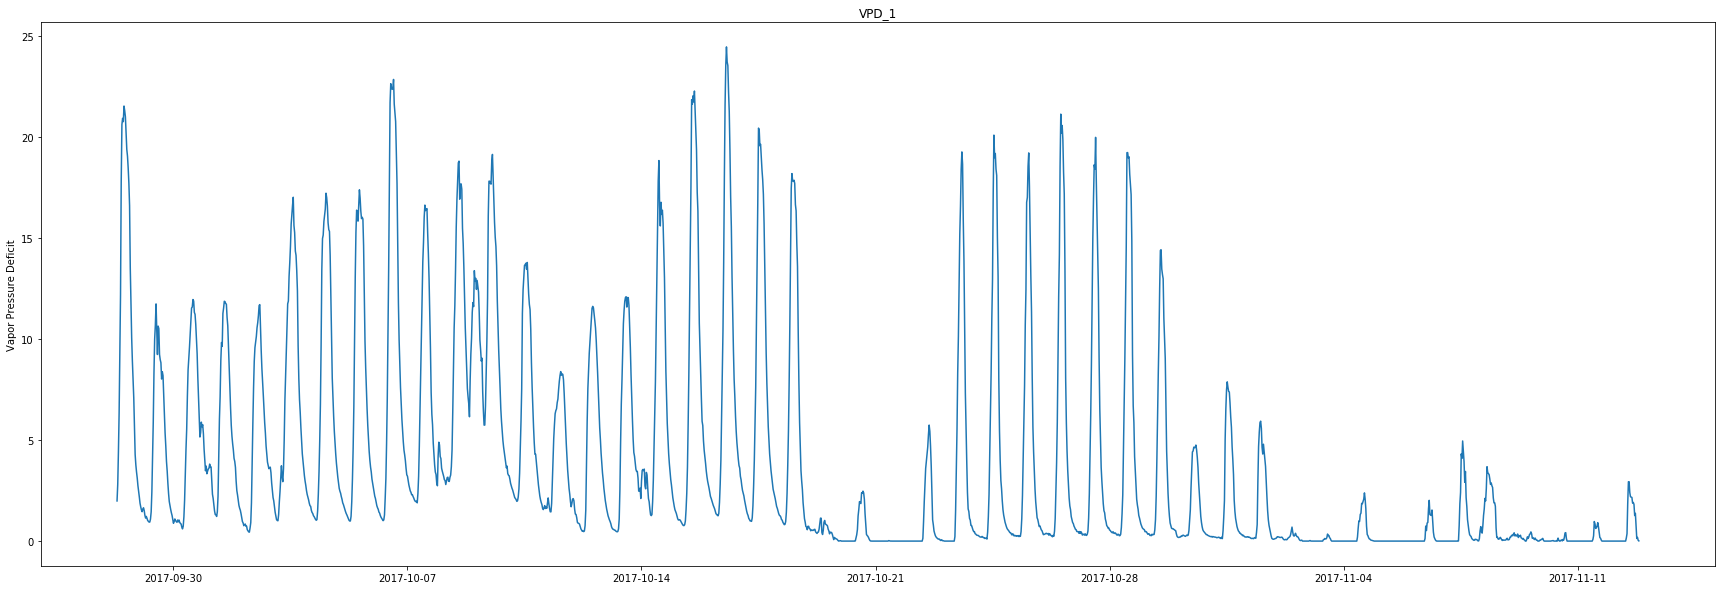

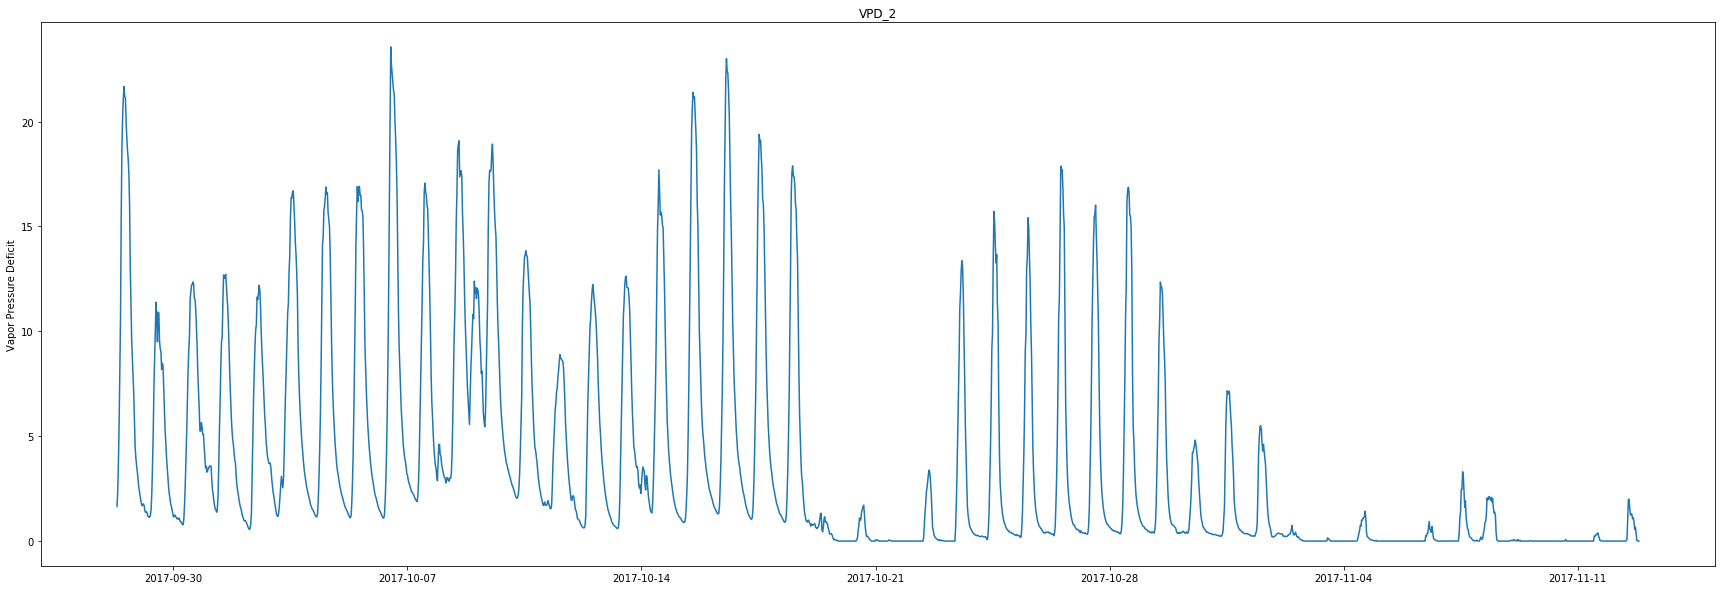

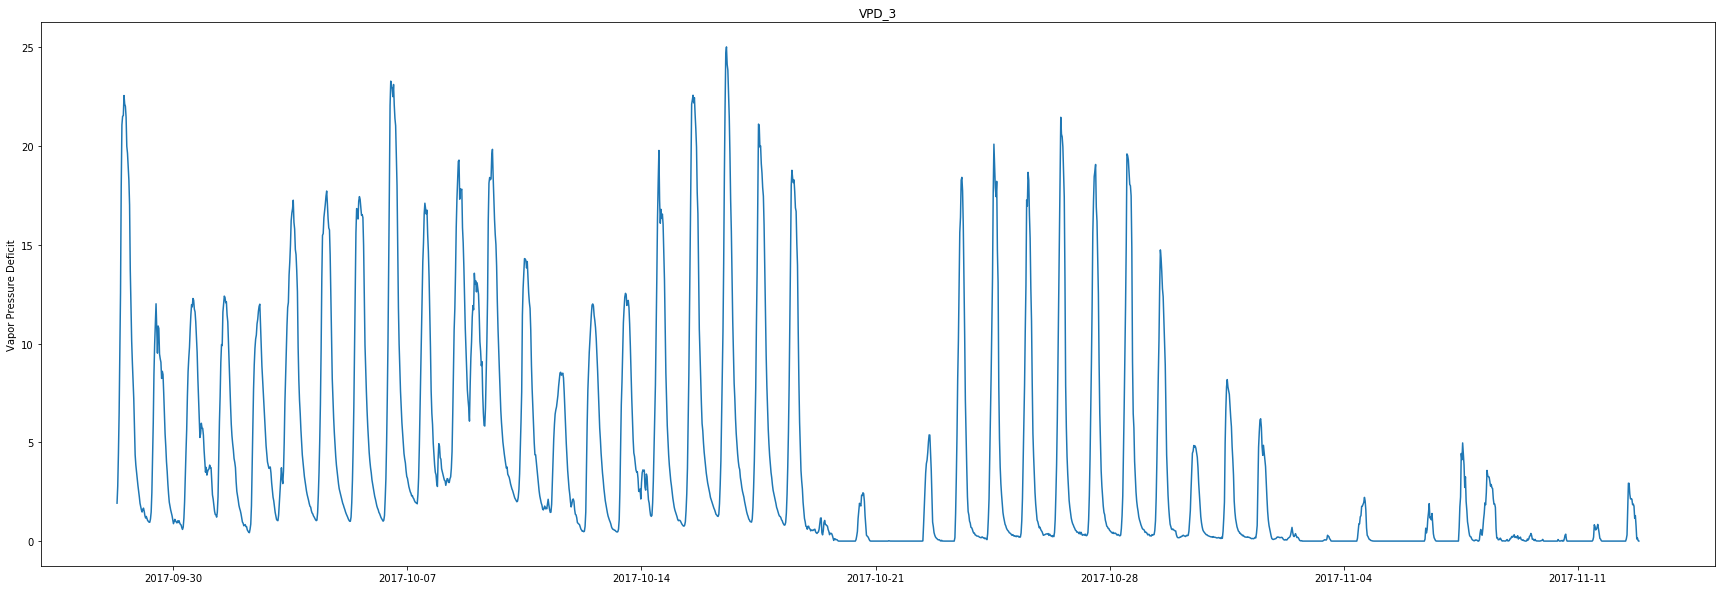

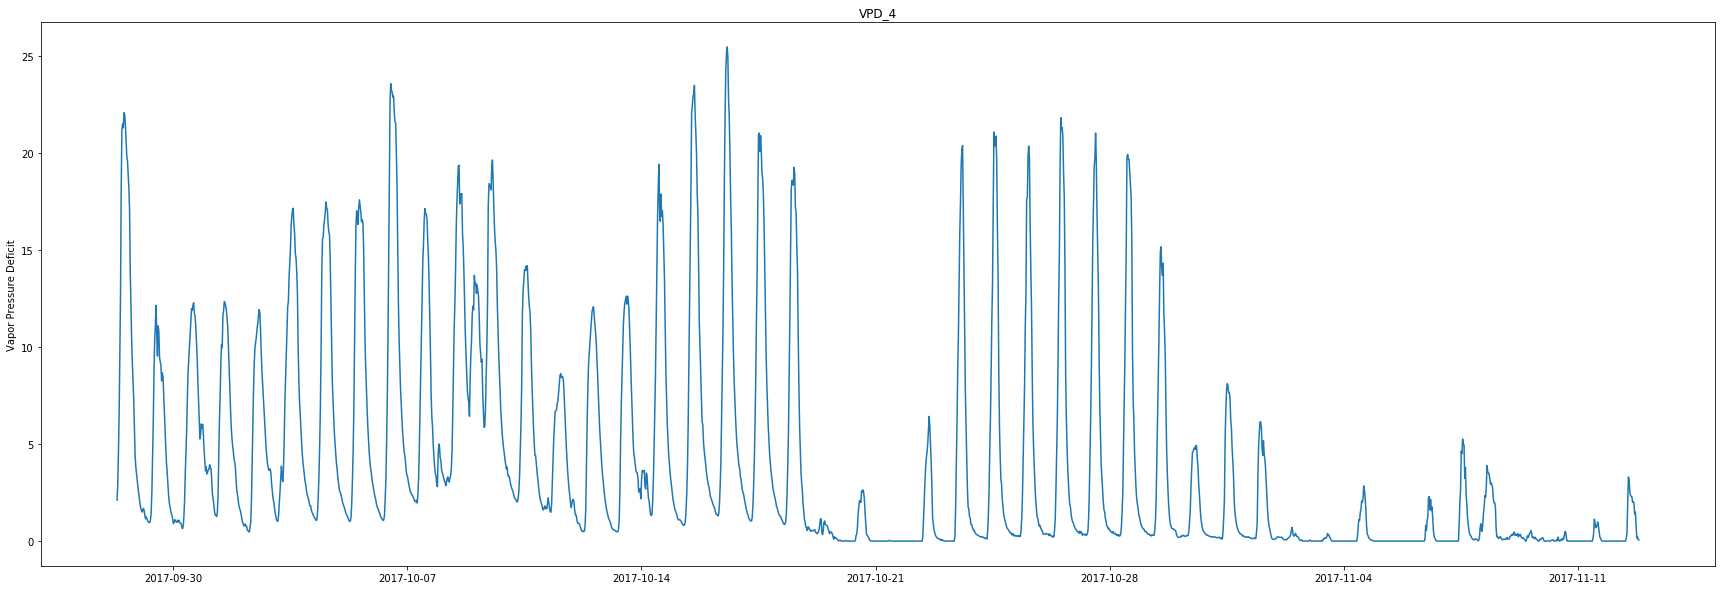

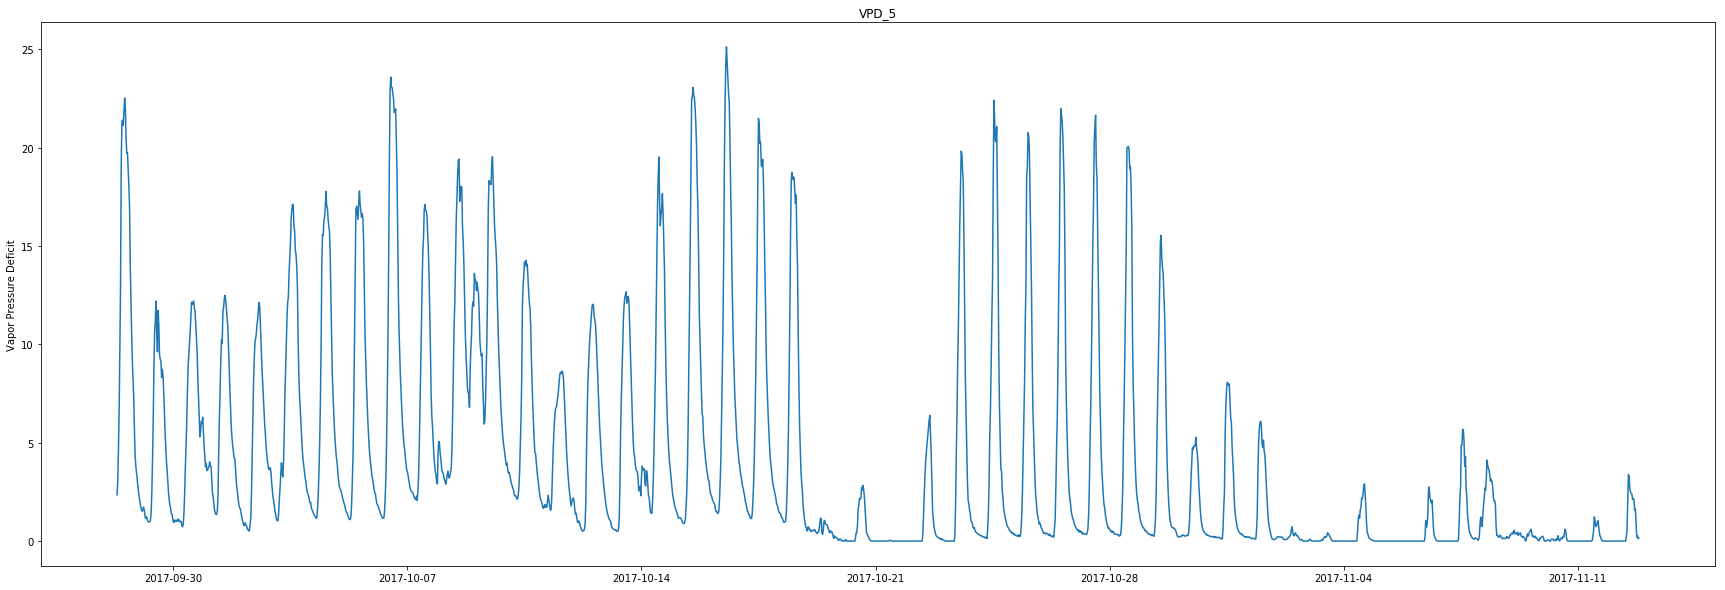

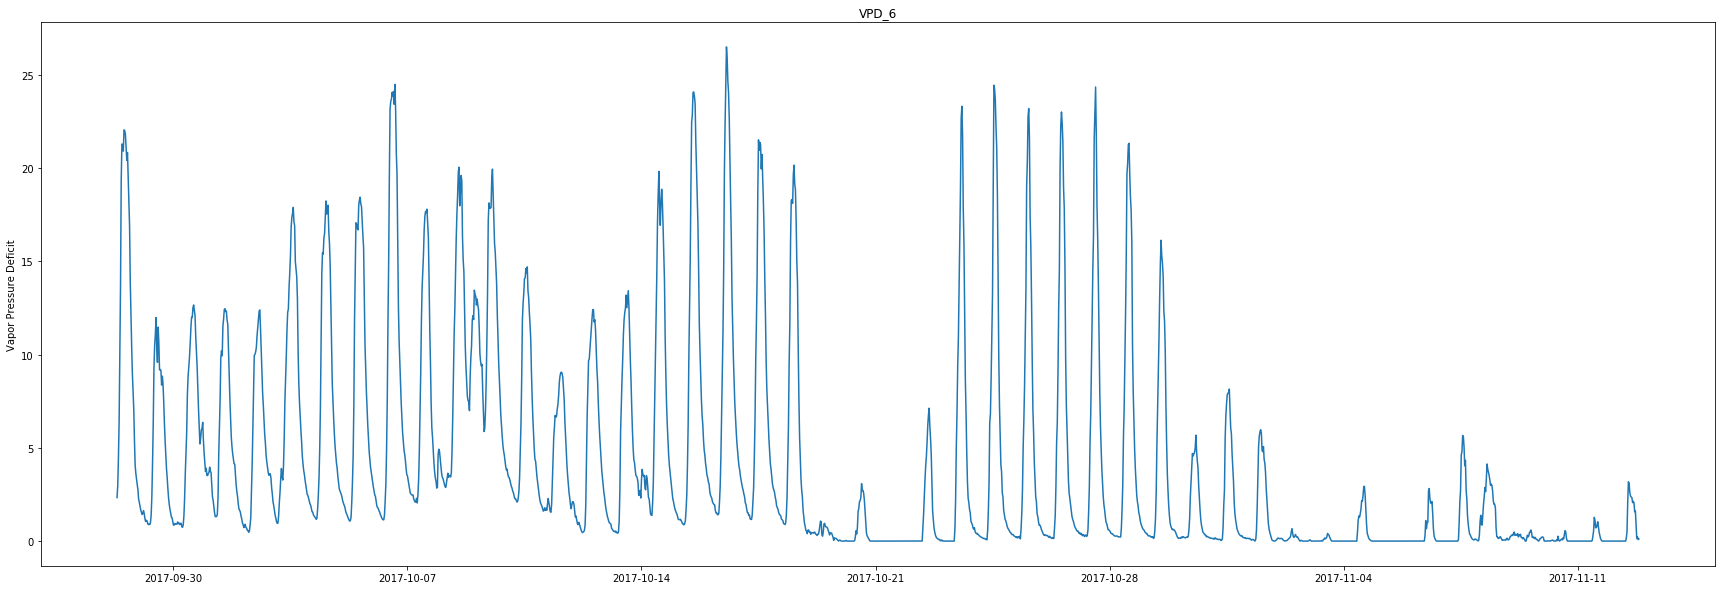

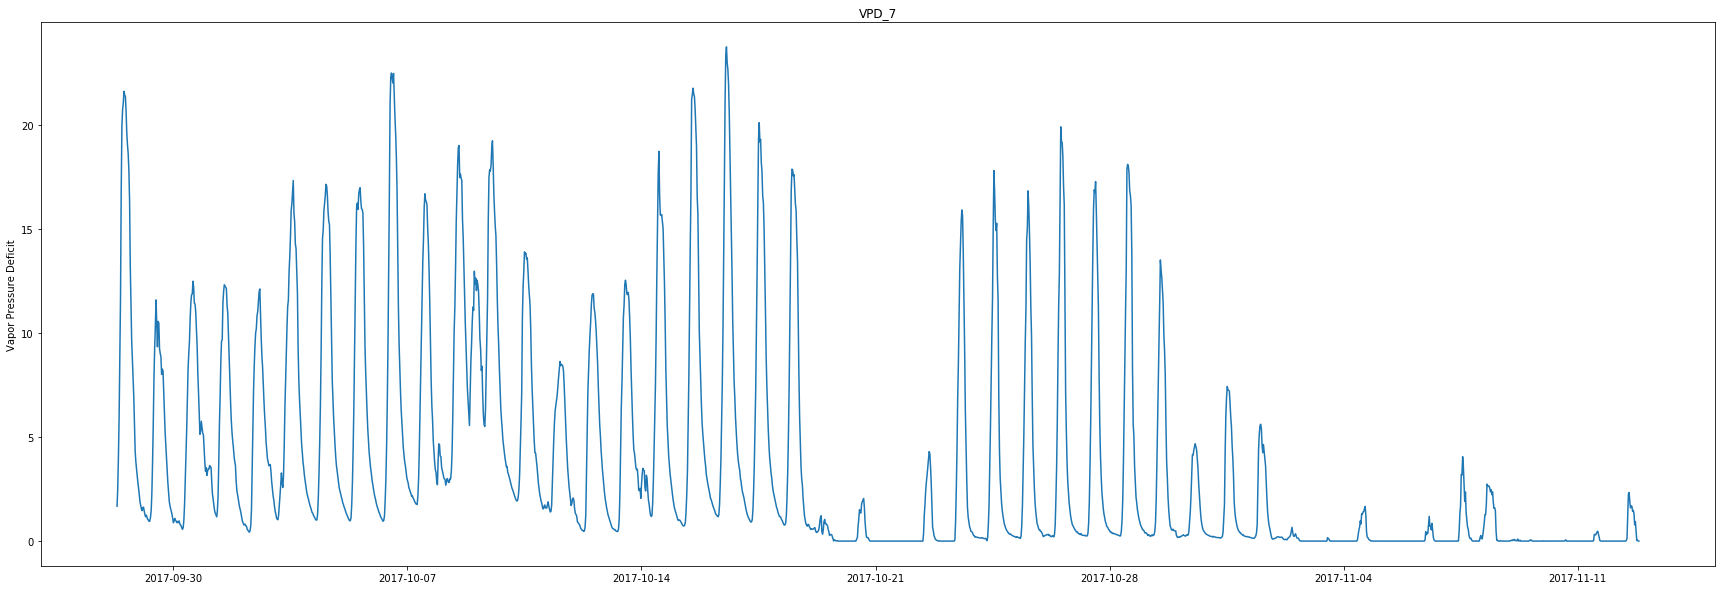

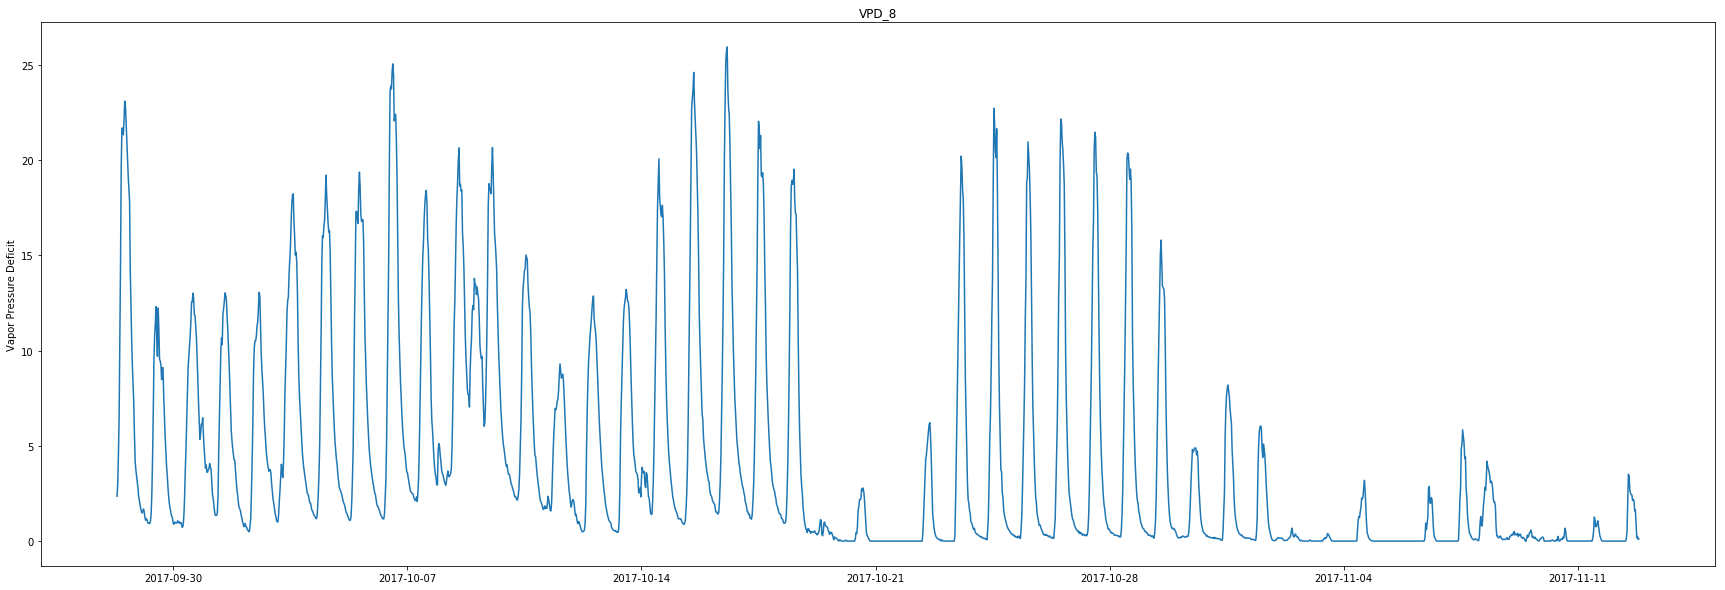

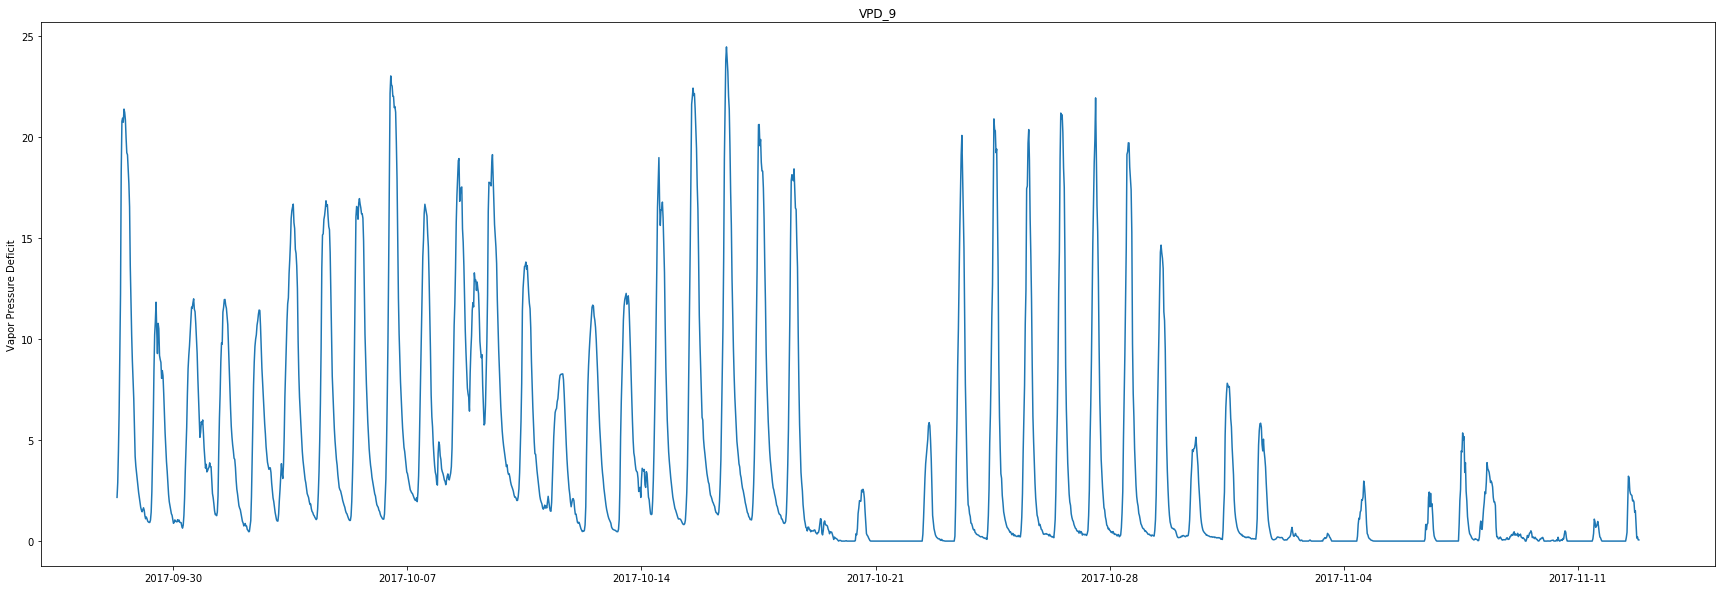

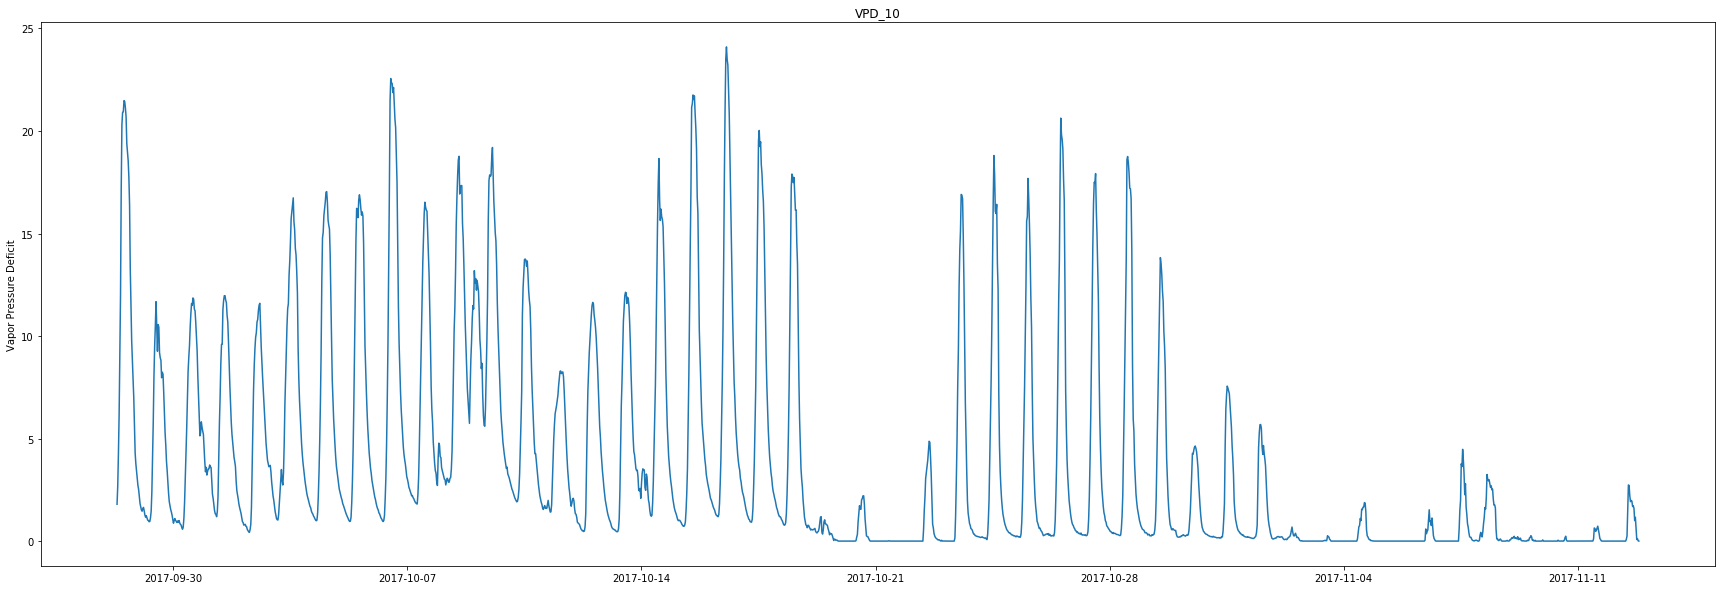

In [137]:
def timeseries(df):
    for sensor in df.columns:
        fig=plt.figure(figsize=(30,10))
        try:
            #df[sensor].plot(title=sensor)
            plt.plot(df[sensor])
        except TypeError:
            print('Failed for sensor ' + sensor)    
        plt.ylabel('Vapor Pressure Deficit')
        plt.title(str(sensor))  
        #plt.xlim(['2017-09-28 00:00:00', '2017-11-12 23:30:00'])
        #df1.to_excel(sensor+title1+'.xlsx')
        plt.show()

timeseries(vpd1)

In [143]:
def average(df):
        
vpd_average = average(vpd)

        

AttributeError: 'DataFrame' object has no attribute 'rows'